# Introduction

In the [first part](https://www.kaggle.com/gustavofelici/1-understanding-business-and-data-using-sql) of this Data Science project, we used SQL to explore the "Brazilian E-Commerce Public Dataset by Olist" dataset and better understand how Olist's e-commerce platform works. Now, in the second part, our focus is on data manipulation and visualization.

In this step we will work with the data already explored in the first part of the project, where we identified some of the most relevant variables for customer satisfaction, such as the product category, the freight value and the delivery time.

We will clean and organize the data to make it easier to work with, and then create visualizations to better understand the relationships between the variables and how they can affect customer satisfaction.

Importantly, the first part of the project is essential for us to understand the context of the data and how it was collected. So if you have not yet checked out the first part, we recommend that you do so before proceeding with this step.

We will explore the data and create visualizations to better understand the relationships between the variables, and thus prepare the data for the third and final stage of the project, where we will predict customer satisfaction based on the review score.

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette="pastel")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Projects/Olist/Output/Olist_features.csv')

# First Look

In [ ]:
df.head()

,Unnamed: 0,order_id,status,purchase,approved,delivered_carrier,delivered_customer,delivery_estimated,has_sequential,has_installments,...,avg_freight,avg_name_lenght,avg_description_name,avg_photos_qty,avg_weight_g,avg_length_cm,avg_height_cm,avg_width_cm,avg_same_city,avg_same_state
0,0,10a045cdf6a5650c21e9cfeb60384c16,canceled,2018-10-17 17:30:18,NaN,NaN,NaN,2018-10-30 00:00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,b059ee4de278302d550a3035c4cdb740,canceled,2018-10-16 20:16:02,NaN,NaN,NaN,2018-11-12 00:00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,a2ac6dad85cf8af5b0afb510a240fe8c,canceled,2018-10-03 18:55:29,NaN,NaN,NaN,2018-10-16 00:00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,616fa7d4871b87832197b2a137a115d2,canceled,2018-10-01 15:30:09,NaN,NaN,NaN,2018-10-23 00:00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,392ed9afd714e3c74767d0c4d3e3f477,canceled,2018-09-29 09:13:03,NaN,NaN,NaN,2018-10-15 00:00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,Unnamed: 0,order_id,status,purchase,approved,delivered_carrier,delivered_customer,delivery_estimated,has_sequential,has_installments,...,avg_freight,avg_name_lenght,avg_description_name,avg_photos_qty,avg_weight_g,avg_length_cm,avg_height_cm,avg_width_cm,avg_same_city,avg_same_state
54006,54006,7d0a0773edc4bdca0ef6ab55777718a7,delivered,2018-01-01 10:24:03,2018-01-03 04:14:33,2018-01-05 20:54:35,2018-01-09 13:13:33,2018-01-18 00:00:00,0,0,...,7.95,24.0,540.0,5.0,300.0,16.0,14.0,11.0,1.0,1.0
54007,54007,67a98eaf984ba84c596f9f5456634f20,delivered,2018-01-01 09:36:21,2018-01-01 09:46:25,2018-01-02 20:44:41,2018-01-13 00:43:32,2018-02-01 00:00:00,0,1,...,50.84,58.0,1893.0,1.0,5950.0,20.0,20.0,20.0,0.0,0.0
54008,54008,fbe41a4974e4a492e085d90e5be0b3e3,delivered,2018-01-01 08:45:04,2018-01-01 08:55:31,2018-01-02 22:33:59,2018-01-05 14:18:41,2018-01-29 00:00:00,0,1,...,11.85,54.0,814.0,1.0,185.0,18.0,12.0,18.0,0.0,1.0
54009,54009,0462bad26ccfb8508951beb9ea398ae1,delivered,2018-01-01 08:37:46,2018-01-01 08:48:19,2018-01-02 17:42:48,2018-01-23 18:15:19,2018-02-09 00:00:00,0,1,...,18.31,50.0,158.0,1.0,1600.0,25.0,9.0,18.0,0.0,0.0
54010,54010,4f6daad34df49e10c8072b33faafcb2a,delivered,2018-01-01 02:48:41,2018-01-01 02:58:25,2018-01-05 18:36:58,2018-01-30 18:43:20,2018-02-05 00:00:00,0,1,...,36.36,53.0,886.0,3.0,1150.0,30.0,30.0,30.0,0.0,0.0


In [ ]:
df.dtypes

Unnamed: 0                int64
order_id                 object
status                   object
purchase                 object
approved                 object
delivered_carrier        object
delivered_customer       object
delivery_estimated       object
has_sequential            int64
has_installments          int64
last_payment            float64
score                   float64
sellers_per_order         int64
product_per_order         int64
shipping_limit           object
avg_price               float64
avg_freight             float64
avg_name_lenght         float64
avg_description_name    float64
avg_photos_qty          float64
avg_weight_g            float64
avg_length_cm           float64
avg_height_cm           float64
avg_width_cm            float64
avg_same_city           float64
avg_same_state          float64
dtype: object

The dates have not been identified

## Order_id is unique?

In [ ]:
len(df['order_id'].unique())

54011

In [ ]:
df.shape

(54011, 26)

yes

## Duplicate data

In [ ]:
df.duplicated().sum()

0

Não possuí linhas duplicadas

## Valores nulos

In [ ]:
df.isnull().sum()

Unnamed: 0                 0
order_id                   0
status                     0
purchase                   0
approved                  82
delivered_carrier        591
delivered_customer      1233
delivery_estimated         0
has_sequential             0
has_installments           0
last_payment               0
score                    376
sellers_per_order          0
product_per_order          0
shipping_limit           236
avg_price                236
avg_freight              236
avg_name_lenght          836
avg_description_name     836
avg_photos_qty           836
avg_weight_g             236
avg_length_cm            236
avg_height_cm            236
avg_width_cm             236
avg_same_city            236
avg_same_state           236
dtype: int64

236 em 


```
shipping_limit            236
avg_price                 236
avg_freight               236
avg_weight_g              236
avg_length_cm             236
avg_height_cm             236
avg_width_cm              236
```

Será que é o mesmo produto? vamos dar uma olhada

In [ ]:
df[df['avg_price'].isnull()]

,Unnamed: 0,order_id,status,purchase,approved,delivered_carrier,delivered_customer,delivery_estimated,has_sequential,has_installments,...,avg_freight,avg_name_lenght,avg_description_name,avg_photos_qty,avg_weight_g,avg_length_cm,avg_height_cm,avg_width_cm,avg_same_city,avg_same_state
0,0,10a045cdf6a5650c21e9cfeb60384c16,canceled,2018-10-17 17:30:18,NaN,NaN,NaN,2018-10-30 00:00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,b059ee4de278302d550a3035c4cdb740,canceled,2018-10-16 20:16:02,NaN,NaN,NaN,2018-11-12 00:00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,a2ac6dad85cf8af5b0afb510a240fe8c,canceled,2018-10-03 18:55:29,NaN,NaN,NaN,2018-10-16 00:00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,616fa7d4871b87832197b2a137a115d2,canceled,2018-10-01 15:30:09,NaN,NaN,NaN,2018-10-23 00:00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,392ed9afd714e3c74767d0c4d3e3f477,canceled,2018-09-29 09:13:03,NaN,NaN,NaN,2018-10-15 00:00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53542,53542,8076135356d195170fe9f8d5698182c4,unavailable,2018-01-03 21:56:47,2018-01-03 22:08:30,NaN,NaN,2018-02-15 00:00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53555,53555,ebb921d271b8b17989e08220637b921f,unavailable,2018-01-03 21:01:54,2018-01-03 21:14:27,NaN,NaN,2018-01-26 00:00:00,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53614,53614,9e99d220ca1057d22b317d36cf203620,unavailable,2018-01-03 17:05:21,2018-01-05 02:35:44,NaN,NaN,2018-02-01 00:00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53805,53805,1ff6183537eb3a189de77b309ed28ad1,unavailable,2018-01-02 17:31:02,2018-01-04 11:57:21,NaN,NaN,2018-01-31 00:00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


como ta o score nesses casos?

In [ ]:
df.loc[df['avg_price'].isnull(), 'score'].value_counts()

1.0    153
5.0     23
2.0     23
3.0     22
4.0      9
Name: score, dtype: int64

It is a very small amount in relation to the size of the data, when I get to analyze this variable, I will see how to do the substitution

# Features

# `score` (Target)


## Null Values

In [ ]:
df['score'].isnull().sum()

376

In [ ]:
df[df['score'].isnull()].head()

,Unnamed: 0,order_id,status,purchase,approved,delivered_carrier,delivered_customer,delivery_estimated,has_sequential,has_installments,...,avg_freight,avg_name_lenght,avg_description_name,avg_photos_qty,avg_weight_g,avg_length_cm,avg_height_cm,avg_width_cm,avg_same_city,avg_same_state
15,15,afb61112fb99b07fe17e591c68c0c84c,canceled,2018-09-06 10:48:12,NaN,NaN,NaN,2018-09-19 00:00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,113,e91a3bc14b8d125d82f0334371c39926,delivered,2018-08-27 17:01:43,2018-08-27 17:10:27,2018-08-28 14:56:00,2018-08-29 20:04:52,2018-08-31 00:00:00,0,0,...,8.48,44.0,420.0,1.0,800.0,28.0,35.0,18.0,0.0,1.0
1196,1196,37e5725572d3cbd7aad103b730f9232a,delivered,2018-08-20 09:18:49,2018-08-20 14:53:41,2018-08-28 16:13:00,2018-08-29 22:58:53,2018-08-27 00:00:00,0,1,...,9.08,55.0,873.0,5.0,650.0,25.0,25.0,25.0,0.0,1.0
1425,1425,aa6e3cc7cf13ef1dc599d1243daee6f6,delivered,2018-08-18 23:54:05,2018-08-21 04:15:19,2018-08-21 14:21:00,2018-08-27 18:40:41,2018-09-20 00:00:00,0,0,...,23.70,59.0,1543.0,1.0,1150.0,40.0,20.0,20.0,0.0,0.0
1639,1639,4ac05edf248d6206469e17c32e52c9ac,delivered,2018-08-17 22:35:51,2018-08-17 22:49:33,2018-08-22 16:33:00,2018-08-25 12:07:33,2018-09-12 00:00:00,0,1,...,23.67,58.0,1223.0,4.0,1400.0,16.0,50.0,16.0,0.0,0.0


Lines with a null score will not help me predict scores, so I will remove these lines

In [ ]:
df = df[df['score'].notna()]

In [ ]:
df['score'].isnull().sum()

0

## Distribution

In [ ]:
df['score'].value_counts()

5.0    31245
4.0    10165
1.0     6237
3.0     4323
2.0     1665
Name: score, dtype: int64

In [ ]:
df['score'].value_counts(normalize=True)

5.0    0.582549
4.0    0.189522
1.0    0.116286
3.0    0.080600
2.0    0.031043
Name: score, dtype: float64

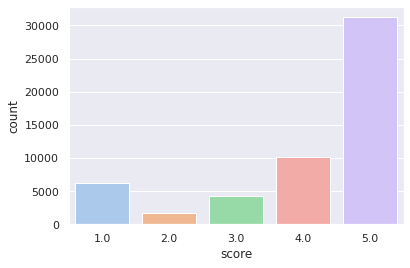

In [ ]:
sns.countplot(data=df, x='score')

The data is unbalanced among the scores, so this will be complicated in the projection because it will be difficult to classify the scores with little representation

# Difference between Dates

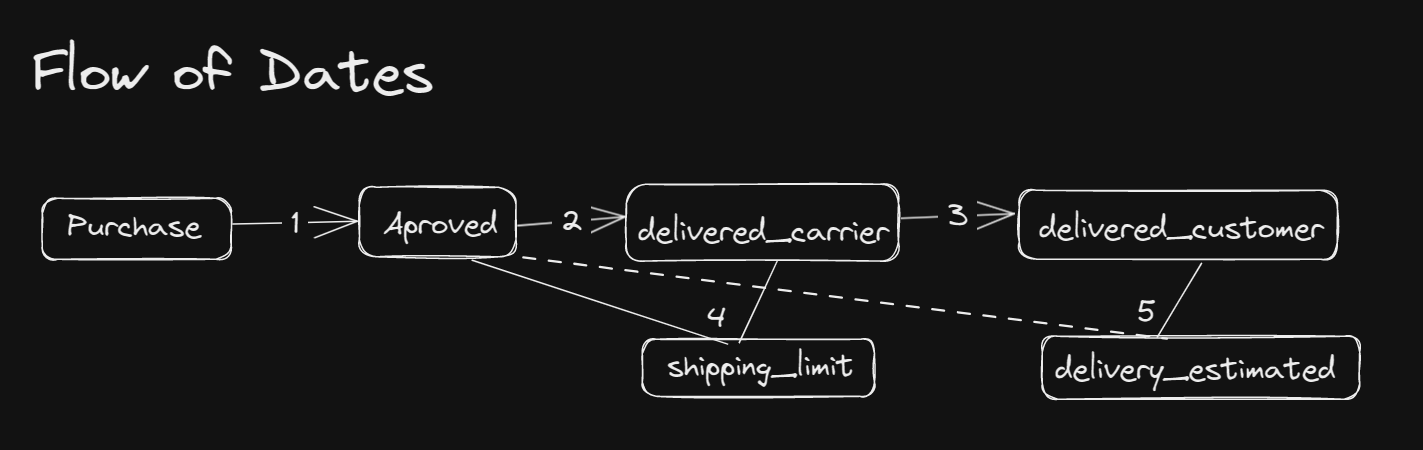

In [ ]:
dates = ['purchase', 'approved','delivered_carrier', 'delivered_customer', 'delivery_estimated', 'shipping_limit' ]
df[dates].dtypes

purchase              object
approved              object
delivered_carrier     object
delivered_customer    object
delivery_estimated    object
shipping_limit        object
dtype: object

## Null Values

In [ ]:
df[dates].isnull().sum()

purchase                 0
approved                79
delivered_carrier      582
delivered_customer    1172
delivery_estimated       0
shipping_limit         230
dtype: int64

In [ ]:
df[dates].isnull().sum().sum() / df.shape[0]

0.038463689754824275

In [ ]:
df['status'].value_counts(normalize=True)

delivered      0.978242
shipped        0.009807
canceled       0.005985
unavailable    0.002648
invoiced       0.002219
processing     0.001100
Name: status, dtype: float64

In [ ]:
df.loc[df['delivered_customer'].isnull(), 'status'].value_counts()

shipped        526
canceled       320
unavailable    142
invoiced       119
processing      59
delivered        6
Name: status, dtype: int64

All the `delivered_customer` nulls are when the status in any status, except this case we have 6 as delivered, so as these cases are not useful to me, because there is no date to be analyzed, I will remove these lines because they do not represent much of the data

In [ ]:
pd.crosstab(df['status'], df['score'])

score,1.0,2.0,3.0,4.0,5.0
status,,,,,
canceled,225,28,28,12,28
delivered,5416,1577,4218,10114,31143
invoiced,94,8,7,3,7
processing,52,1,2,2,2
shipped,340,42,58,31,55
unavailable,110,9,10,3,10


However, within these dates each one of these scores that is not delivered, has a higher chance of being score = 1, if I remove this whole set of rows where the dates are null, I would lose this part of the data

In [ ]:
df.loc[df['status'] != 'delivered', 'status'].value_counts().sum() / df.shape[0]

0.021758180292719306

But this part represents little of our set, only 2%.

In [ ]:
df['score'].value_counts(normalize=True) * 100

5.0    58.254871
4.0    18.952177
1.0    11.628601
3.0     8.060035
2.0     3.104316
Name: score, dtype: float64

Remembering that my target is very unbalanced, let's see how the target looks with this modification

In [ ]:
test = df.dropna(subset=dates, how='any')
test['score'].value_counts(normalize=True) * 100

5.0    59.352305
4.0    19.278349
1.0    10.321560
3.0     8.041858
2.0     3.005928
Name: score, dtype: float64

There weren't as many values as expected, so I'm going to remove these columns, because it will mess up the forecast

In [ ]:
df = df.dropna(subset=dates, how='any')

In [ ]:
df[dates].isnull().sum()

purchase              0
approved              0
delivered_carrier     0
delivered_customer    0
delivery_estimated    0
shipping_limit        0
dtype: int64

## Transform

In [ ]:
for date in dates:
  df[date] = pd.to_datetime(df[date]).dt.date

df[dates].dtypes

<ipython-input-192-4545301bfe92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date] = pd.to_datetime(df[date]).dt.date


purchase              object
approved              object
delivered_carrier     object
delivered_customer    object
delivery_estimated    object
shipping_limit        object
dtype: object

In [ ]:
df[dates].iloc[134:136] # checking format

,purchase,approved,delivered_carrier,delivered_customer,delivery_estimated,shipping_limit
169,2018-08-26,2018-08-26,2018-08-27,2018-08-30,2018-09-05,2018-08-28
170,2018-08-26,2018-08-26,2018-08-27,2018-08-30,2018-09-18,2018-08-28


In [ ]:
!pip install workalendar
from workalendar.america.brazil import Brazil
cal = Brazil()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## How does the library handle negative difference dates?

In [ ]:
from datetime import date
date1 = date(2023, 2, 17)
date2 = date(2023, 2, 21)

print(date2 < date1)
cal.get_working_days_delta( date1, date2)

False


2

The function does not return negative values, so I will have to do some customization to make it work the way we expect.

## Difference

In [ ]:
def working_days(date1, date2):
  if date1 < date2:
    return (cal.get_working_days_delta( date1, date2)) *(-1)
  else:
    return cal.get_working_days_delta( date1, date2)

def diff_dates(column1, column2):
  return df.apply(lambda row: working_days( row[column1], row[column2] ) , axis=1)

In [ ]:
def see_distribution(column):
  fig, (ax1,ax2) = plt.subplots(2,2, figsize=(30,8))
  
  sns.histplot(data=df,x=column, stat='percent', discrete=True, ax=ax1[0])
  sns.boxplot(data=df, x=column, ax=ax1[1])

  sns.histplot(data=df,x=column, hue='score', stat='percent', discrete=True, ax=ax2[0])
  sns.boxplot(data=df,y='score', x=column,orient='h', ax=ax2[1])

  plt.plot()

  return df.groupby('score')[column].describe()

### purchase_to_approved

,count,mean,std,min,25%,50%,75%,max
score,,,,,,,,
1.0,5415.0,0.397969,0.786779,0.0,0.0,0.0,1.0,22.0
2.0,1577.0,0.417248,0.742753,0.0,0.0,0.0,1.0,7.0
3.0,4219.0,0.422849,0.826258,0.0,0.0,0.0,1.0,22.0
4.0,10114.0,0.408641,0.742282,0.0,0.0,0.0,1.0,13.0
5.0,31138.0,0.401214,0.727879,0.0,0.0,0.0,1.0,8.0


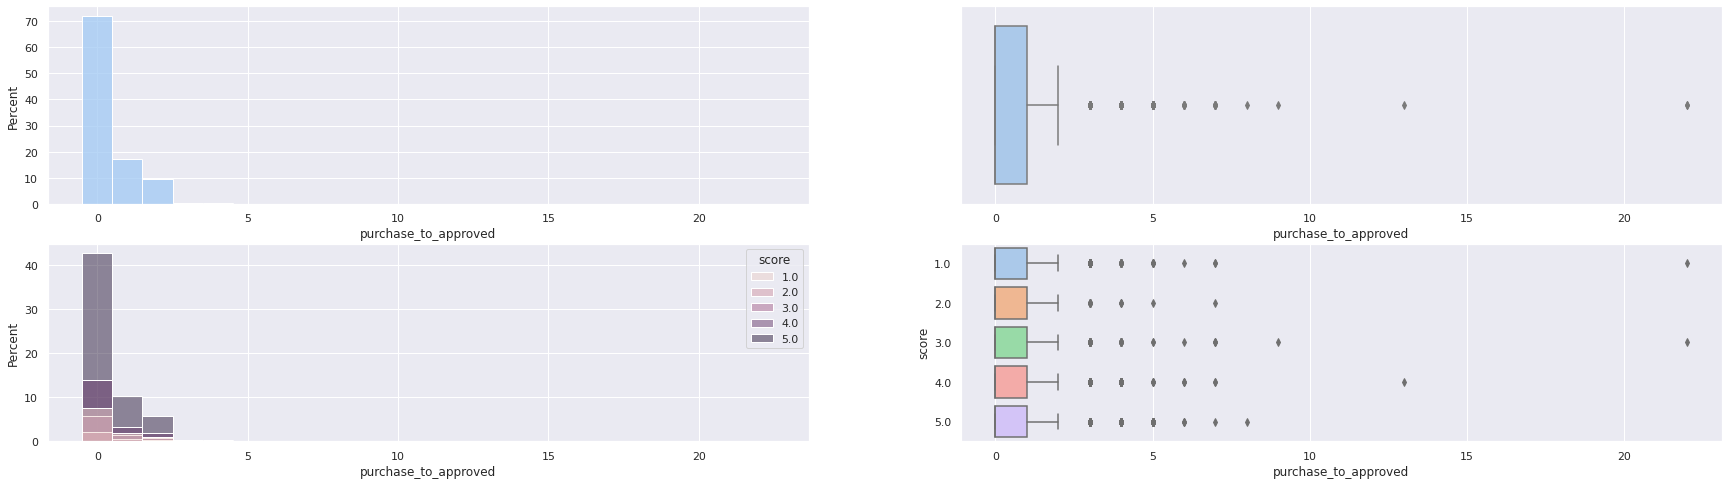

In [ ]:
df['purchase_to_approved'] = diff_dates('approved', 'purchase')
see_distribution('purchase_to_approved')

No problems or indicators found, the mean and median is balanced between the scores

### approved_to_carrier

,count,mean,std,min,25%,50%,75%,max
score,,,,,,,,
1.0,5415.0,2.721699,3.655097,-4.0,1.0,2.0,3.0,35.0
2.0,1577.0,2.449588,3.181706,-2.0,1.0,1.0,3.0,25.0
3.0,4219.0,2.099550,2.603850,-4.0,1.0,1.0,3.0,30.0
4.0,10114.0,1.852086,2.214912,-4.0,1.0,1.0,2.0,35.0
5.0,31138.0,1.605627,1.947088,-120.0,1.0,1.0,2.0,40.0


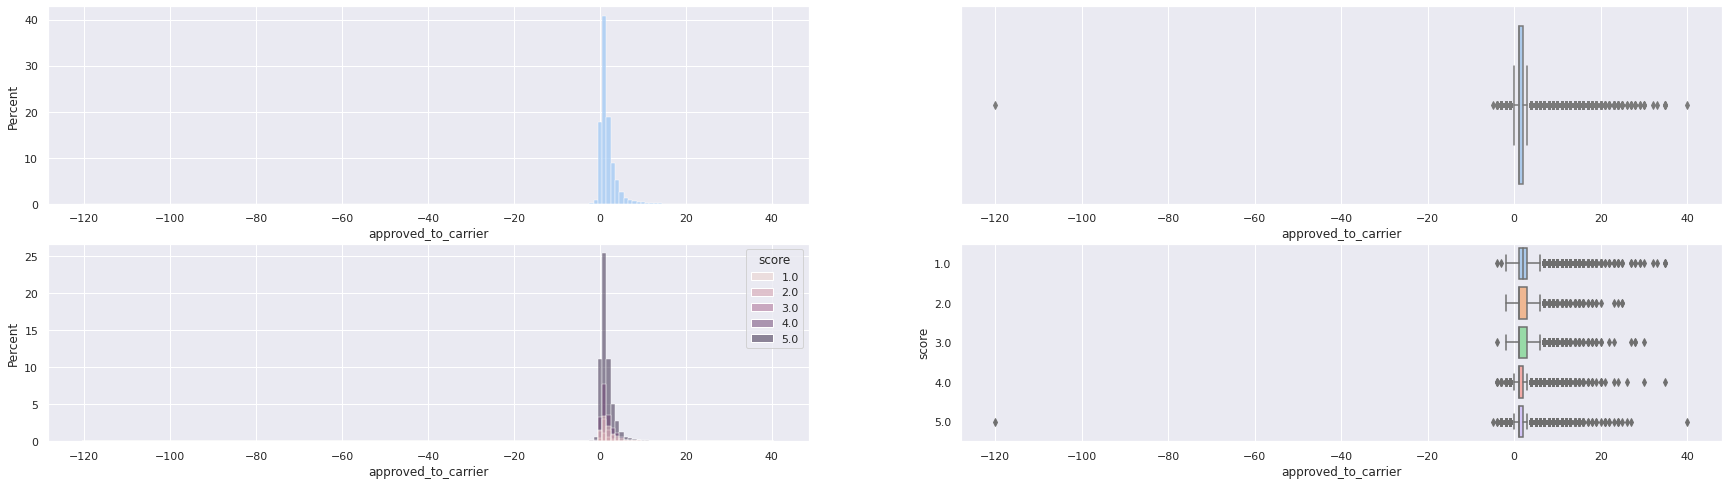

In [ ]:
df['approved_to_carrier'] = diff_dates('delivered_carrier', 'approved')
see_distribution('approved_to_carrier')

Presence of one outlier at -120, and a tendency of the increase of the mean in relation to the decrease of the score, that is, the lower the score the higher the `aproved_to_carier`, we also have a tendency of the mean to rise according to a decrease in the score and the median is stable, but the score = 1 is higher than the others

### carrier_to_customer

,count,mean,std,min,25%,50%,75%,max
score,,,,,,,,
1.0,5415.0,12.105078,10.731254,0.0,4.0,8.0,18.5,112.0
2.0,1577.0,8.916297,8.689108,0.0,3.0,6.0,12.0,145.0
3.0,4219.0,7.605120,6.403682,0.0,3.0,6.0,11.0,50.0
4.0,10114.0,6.135060,5.037597,0.0,3.0,5.0,8.0,103.0
5.0,31138.0,5.229045,4.359575,0.0,2.0,4.0,7.0,125.0


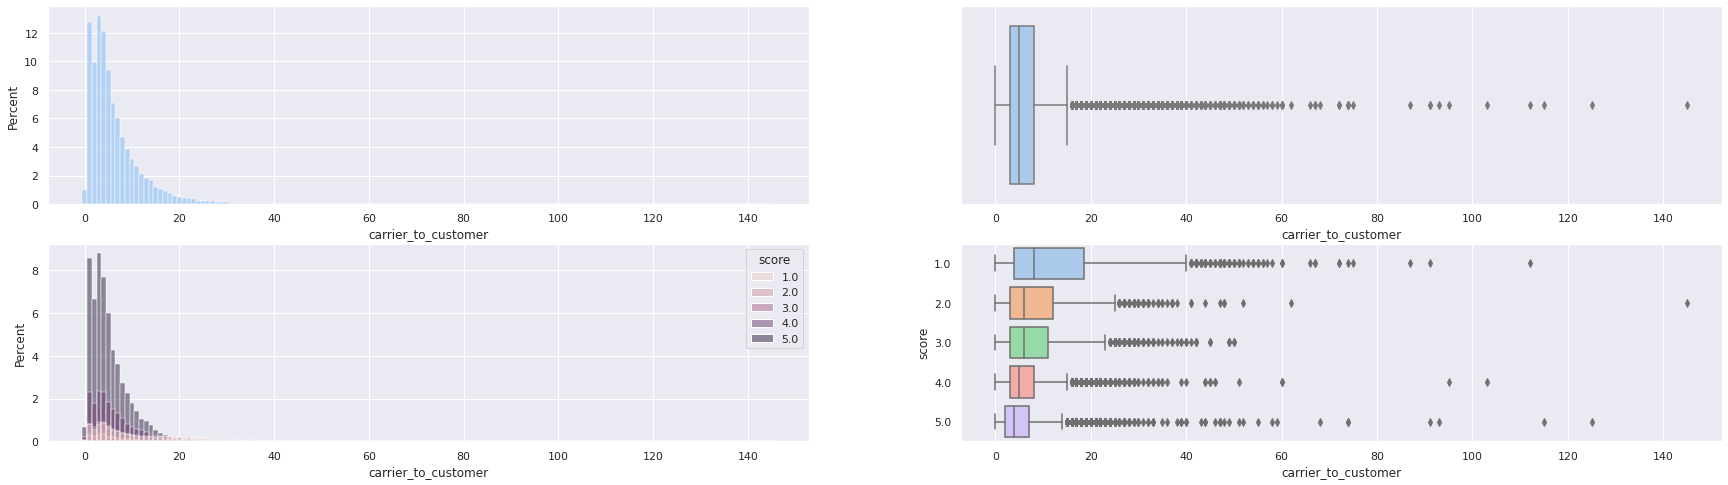

In [ ]:
df['carrier_to_customer'] = diff_dates('delivered_customer', 'delivered_carrier')
see_distribution('carrier_to_customer')

Here we see clearly in the central tendency measures as mean and median an increase of the value according to the decrease of the score, and we can also easily evaluate this difference in the boxplot and in the graph this correlation of the two variables

### estimated_to_customer

,count,mean,std,min,25%,50%,75%,max
score,,,,,,,,
1.0,5415.0,-2.341274,10.996820,-35.0,-10.0,-4.0,5.0,124.0
2.0,1577.0,-5.662016,9.356072,-37.0,-11.0,-6.0,-1.0,132.0
3.0,4219.0,-7.228016,7.282139,-96.0,-11.0,-7.0,-3.0,39.0
4.0,10114.0,-8.567135,6.163924,-44.0,-12.0,-8.0,-5.0,89.0
5.0,31138.0,-9.209808,5.843503,-104.0,-12.0,-9.0,-6.0,95.0


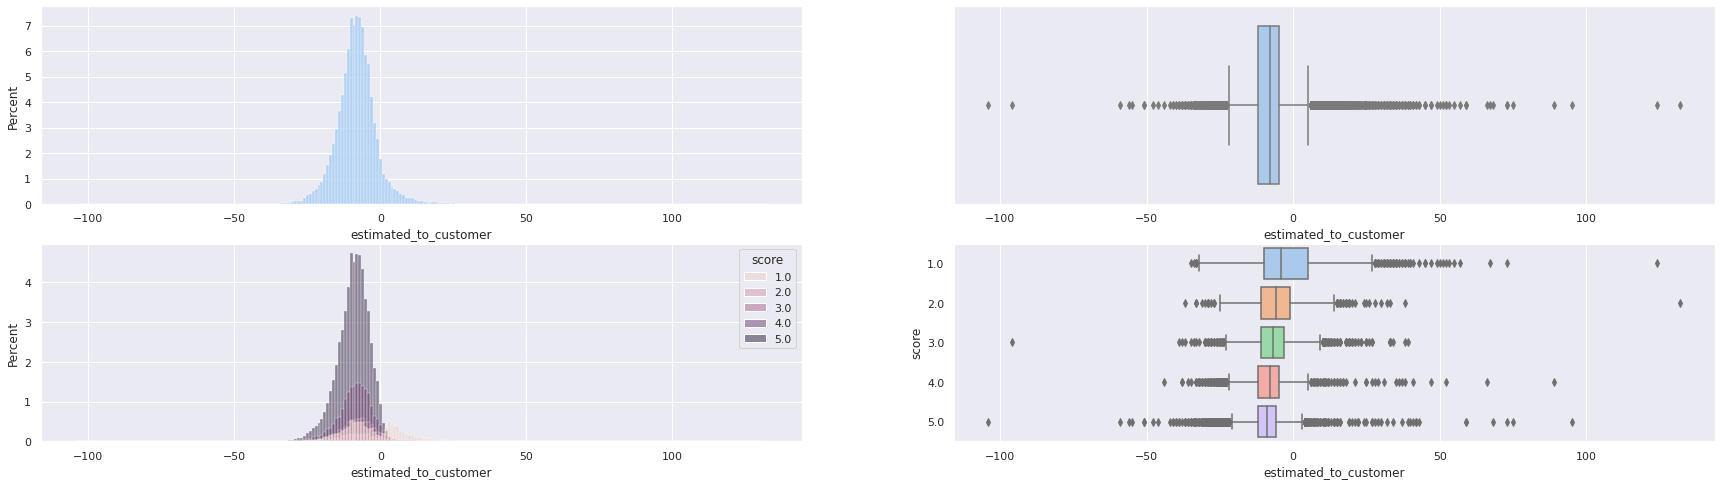

In [ ]:
df['estimated_to_customer'] = diff_dates('delivered_customer', 'delivery_estimated')
see_distribution('estimated_to_customer')

Here we can see the same thing as with `carrier_to_customer` the central averaging trends and visualizing them, showing the predictive power of this feture

### limit_to_carrier

,count,mean,std,min,25%,50%,75%,max
score,,,,,,,,
1.0,5415.0,-1.781717,3.311497,-27.0,-3.0,-2.0,-1.0,31.0
2.0,1577.0,-2.001268,2.843194,-16.0,-3.0,-2.0,-1.0,17.0
3.0,4219.0,-2.242000,2.355744,-20.0,-3.0,-2.0,-1.0,15.0
4.0,10114.0,-2.360589,2.087238,-30.0,-3.0,-2.0,-1.0,31.0
5.0,31138.0,-2.469587,2.141520,-124.0,-3.0,-2.0,-1.0,36.0


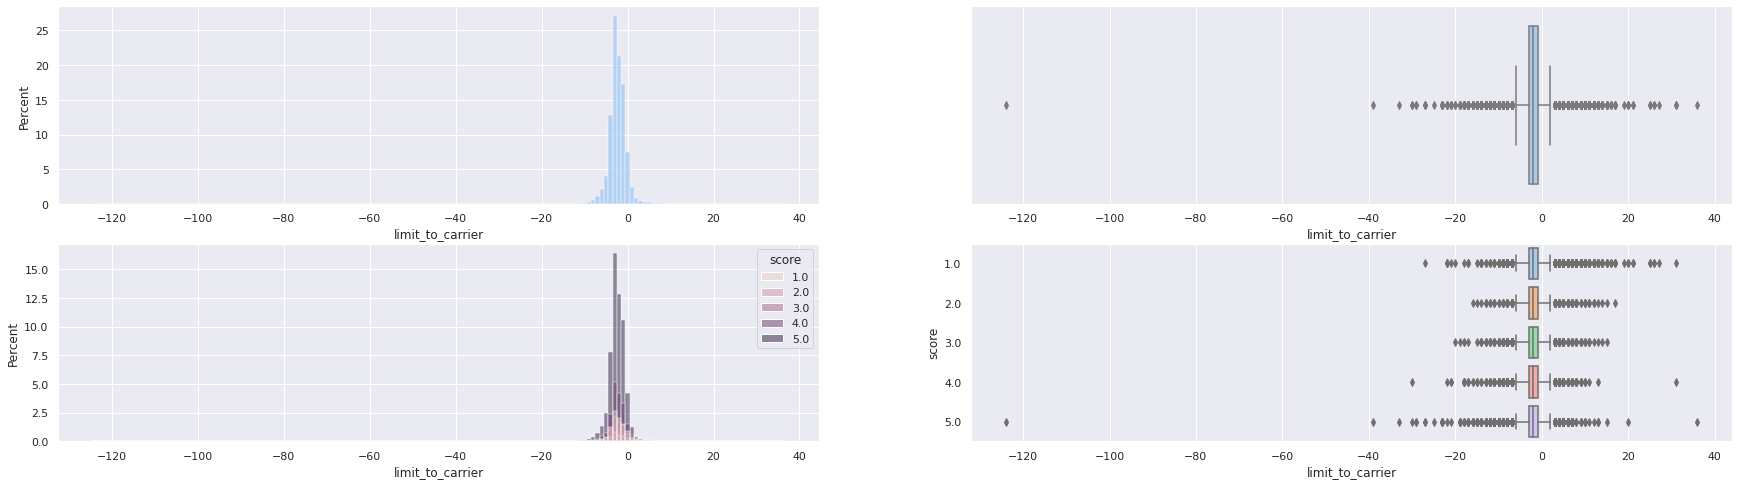

In [ ]:
df['limit_to_carrier'] = diff_dates('delivered_carrier', 'shipping_limit')
see_distribution('limit_to_carrier')

It has a stability between the quartiles, showing a small variation in relation to the average with a decrease of the values according to the decrease of the score, but we don't see this in the minimum or maximum values, this tendency exists only in the average

## Pairplot
All the relations of the dates in relation to the score, let's understand if there are combinations with tendencies for a higher or lower score according to the linear regression

In [ ]:
data_features = ['purchase_to_approved', 'approved_to_carrier', 'carrier_to_customer', 'estimated_to_customer','limit_to_carrier']

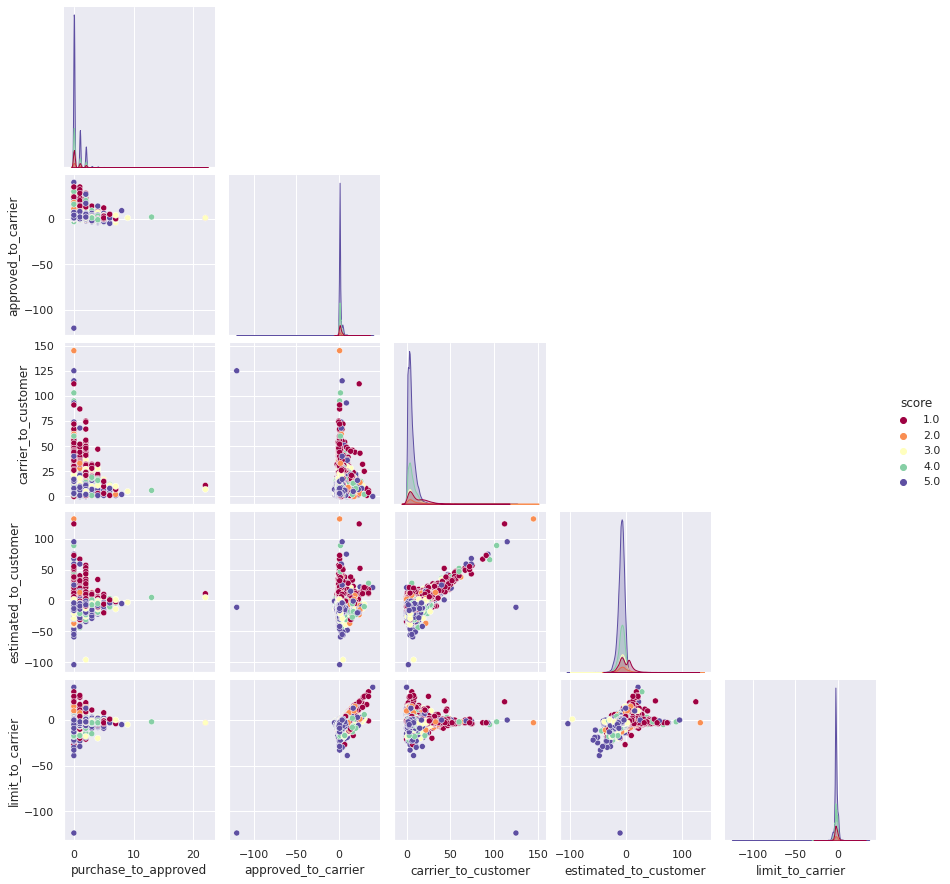

In [ ]:
sns.pairplot(data=df[data_features + ['score']], hue='score', corner=True, palette='Spectral')

#### 1. `estimated_to_customer` and `carrier_to_customer`

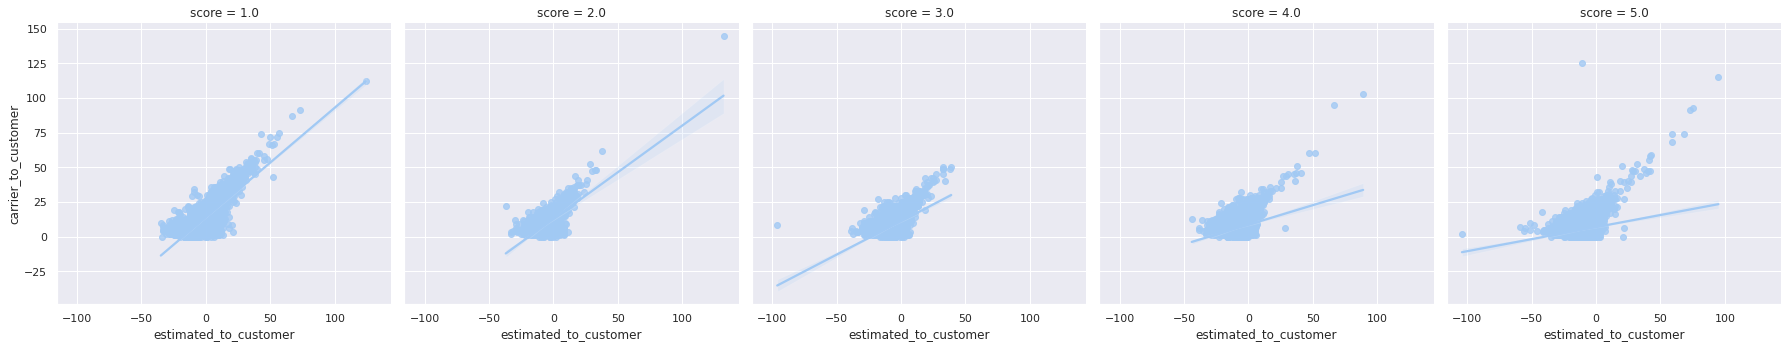

In [ ]:
sns.lmplot(data=df, x='estimated_to_customer', y='carrier_to_customer', col='score')

A strong relationship between `carrier_to_customer` and `estimated_to_customer`, This means that the greater the waiting time from carrier to consumer, the greater is the estimated time of delivery to the consumer. This has a logical sense of course, but what we see is a tendency we `score 1, 2, 3, 4` to be higher, ie a low score is linked to a large waiting time, both estimated and that has actually taken to reach the consumer.

### Correlation

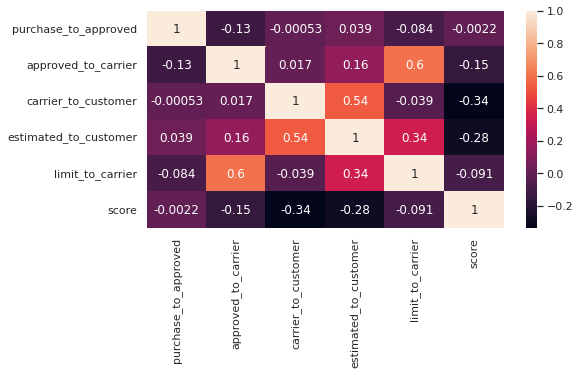

In [ ]:
df_corr = df[data_features + ['score']].corr()

plt.figure(figsize=(8,4))
sns.heatmap(df_corr, annot=True)

# Status

In [ ]:
df['status'].value_counts()

delivered    52462
canceled         1
Name: status, dtype: int64

In [ ]:
df.loc[df['status'] == 'canceled']

,Unnamed: 0,order_id,status,purchase,approved,delivered_carrier,delivered_customer,delivery_estimated,has_sequential,has_installments,...,avg_length_cm,avg_height_cm,avg_width_cm,avg_same_city,avg_same_state,purchase_to_approved,approved_to_carrier,carrier_to_customer,estimated_to_customer,limit_to_carrier
42488,42488,1950d777989f6a877539f53795b4c3c3,canceled,2018-02-19,2018-02-19,2018-02-20,2018-03-21,2018-03-09,0,1,...,20.0,11.0,17.0,0.0,0.0,0,1,21,8,-3


In [ ]:
df.loc[df['status'] == 'canceled', 'score']

42488    3.0
Name: score, dtype: float64

There doesn't seem to be any problem with the canceled line, so I'll keep the line

This variable does not have enough representativeness in the data to say anything, so it does not go into the model

## Payment

In [ ]:
payments = ['has_sequential', 'has_installments', 'last_payment']
df[payments].head()

,has_sequential,has_installments,last_payment
26,0,0,93.75
27,0,0,33.23
28,0,0,61.29
29,0,1,510.96
30,0,1,73.10


In [ ]:
df[payments].isnull().sum()

has_sequential      0
has_installments    0
last_payment        0
dtype: int64

### Has Sequential

In [ ]:
df['has_sequential'].value_counts(normalize=True)

0    0.9724
1    0.0276
Name: has_sequential, dtype: float64

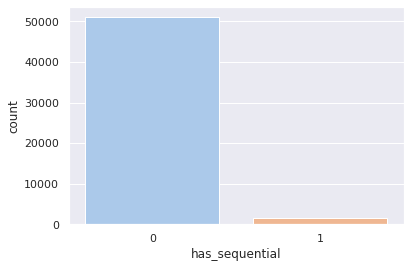

In [ ]:
sns.countplot(x=df['has_sequential'])

the vast majority of payments(97%) are not sequential

### Has installments

In [ ]:
df['has_installments'].value_counts(normalize=True)

0    0.503555
1    0.496445
Name: has_installments, dtype: float64

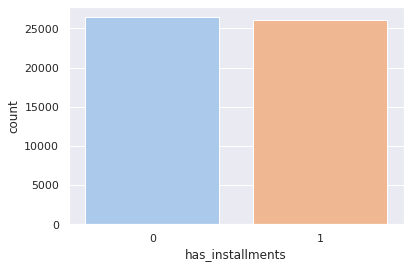

In [ ]:
sns.countplot(x=df['has_installments'])

They are almost equally divided

## Contingency Matrix

[]

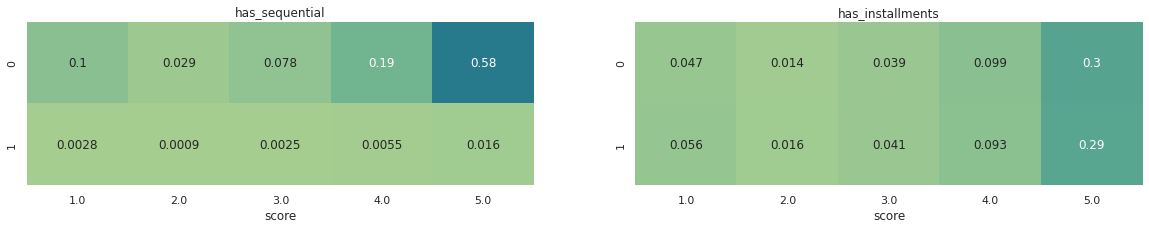

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(20,3))
i=0
for column in payments[:-1]:
  sns.heatmap(pd.crosstab(df[column], df['score'], normalize=True), annot=True, vmin=0, vmax=1, cbar=False, cmap='crest', ax=ax[i]).set(ylabel='')
  ax[i].set_title(column)
  i+=1

plt.plot()

The "has_installments" is equally divided among all categories, it doesn't seem to have a predictive power, unlike "has_sequential" that has variants because its distribution is unbalanced 

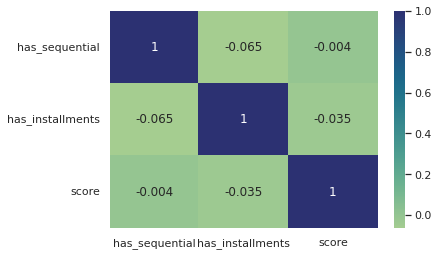

In [ ]:
df_corr = df[ ['has_sequential', 'has_installments', 'score'] ].corr()
sns.heatmap(df_corr, annot=True, cmap='crest')

Both show a possible value in the correlation, so I'll add it to my model

### Last Payment
Does the amount of the last payment have any correlation with the Score?

[]

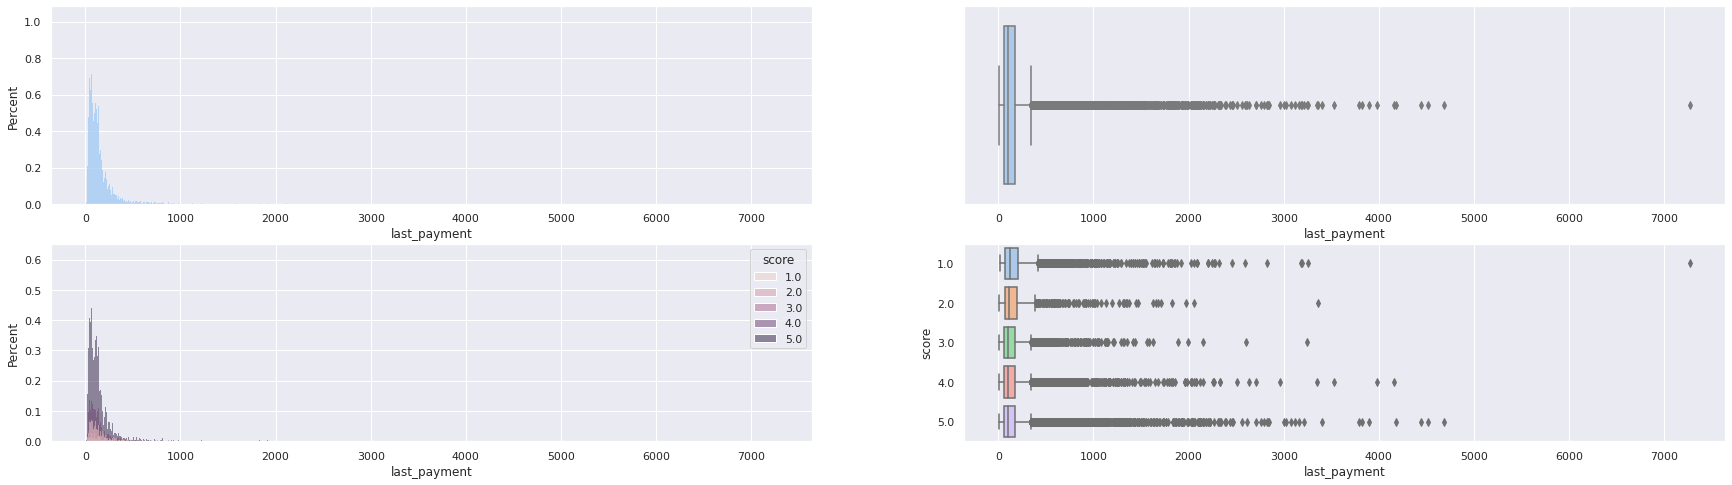

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,2, figsize=(30,8))
  
sns.histplot(data=df,x='last_payment', stat='percent', discrete=True, ax=ax1[0])
sns.boxplot(data=df, x='last_payment', ax=ax1[1])

sns.histplot(data=df,x='last_payment', hue='score', stat='percent', discrete=True, ax=ax2[0])
sns.boxplot(data=df,y='score', x='last_payment',orient='h', ax=ax2[1])

plt.plot()

The distribution apparently seems to keep equally the value between each bar of the histogram, let's get the average for each score to see if we understand it the same way

In [ ]:
df.groupby('score')['last_payment'].describe()

,count,mean,std,min,25%,50%,75%,max
score,,,,,,,,
1.0,5415.0,191.695900,262.488550,12.34,70.1500,123.18,208.370,7274.88
2.0,1577.0,174.324350,221.470162,6.00,65.5300,114.35,195.540,3358.24
3.0,4219.0,151.826518,175.362864,8.33,59.7450,104.50,173.995,3242.84
4.0,10114.0,153.868992,203.535378,8.66,60.2525,102.64,172.035,4163.51
5.0,31138.0,154.476928,204.131487,4.34,59.3300,103.26,172.620,4681.78


in the data from the central tendency measures mean and median we see a considerable increase while the score decreases and the quartiles show this correlation too, so the outilier are not disturbing this result

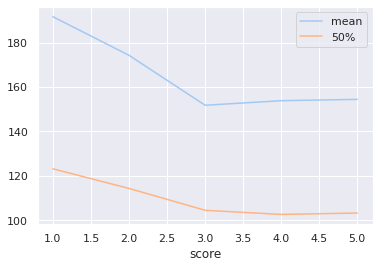

In [ ]:
df.groupby('score')['last_payment'].describe()[[ 'mean', '50%' ]].plot()

the data distribution shows us a strong tendency to be a good variable for data prediction so let's use it in our model

In [ ]:
payment = ['has_sequential','has_installments', 'last_payment']

# Itens

In [ ]:
df.columns

Index(['Unnamed: 0', 'order_id', 'status', 'purchase', 'approved',
       'delivered_carrier', 'delivered_customer', 'delivery_estimated',
       'has_sequential', 'has_installments', 'last_payment', 'score',
       'sellers_per_order', 'product_per_order', 'shipping_limit', 'avg_price',
       'avg_freight', 'avg_name_lenght', 'avg_description_name',
       'avg_photos_qty', 'avg_weight_g', 'avg_length_cm', 'avg_height_cm',
       'avg_width_cm', 'avg_same_city', 'avg_same_state',
       'purchase_to_approved', 'approved_to_carrier', 'carrier_to_customer',
       'estimated_to_customer', 'limit_to_carrier'],
      dtype='object')

In [ ]:
itens = ['sellers_per_order', 'product_per_order', 'avg_price', 'avg_freight']

### sellers_per_order e product_per_order

In [ ]:
df['sellers_per_order'].value_counts(normalize=True)

1    0.985056
2    0.014200
3    0.000667
5    0.000038
4    0.000038
Name: sellers_per_order, dtype: float64

In [ ]:
df['product_per_order'].value_counts(normalize=True)

1    0.967501
2    0.028782
3    0.002935
4    0.000515
5    0.000114
6    0.000095
7    0.000038
8    0.000019
Name: product_per_order, dtype: float64

In [ ]:
df['has_sellers'] = df['sellers_per_order'].apply(lambda x: 1 if x > 1 else 0)
df['has_products'] = df['product_per_order'].apply(lambda x: 1 if x > 1 else 0)

In [ ]:
df['has_sellers'].value_counts(normalize=True)

0    0.985056
1    0.014944
Name: has_sellers, dtype: float64

In [ ]:
df['has_products'].value_counts(normalize=True)

0    0.967501
1    0.032499
Name: has_products, dtype: float64

Even grouping, as expected the amount of data is very unbalanced, maybe with a contingency table it will be a little clearer some idea about the data

[]

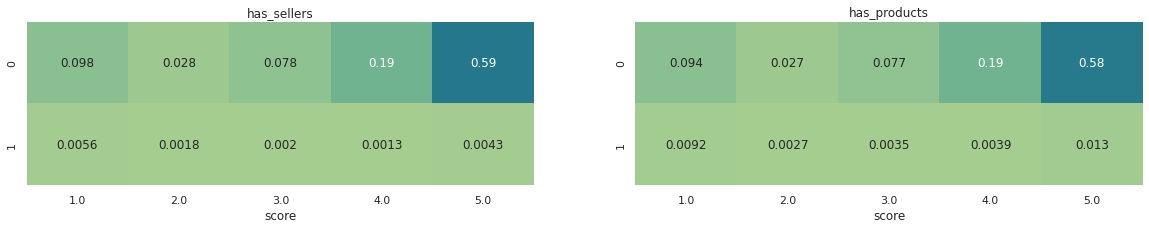

In [ ]:
itens_columns = ['has_sellers', 'has_products']
fig, ax = plt.subplots(ncols=2, figsize=(20,3))
i=0
for column in itens_columns:
  sns.heatmap(pd.crosstab(df[column], df['score'], normalize=True), annot=True, vmin=0, vmax=1, cbar=False, cmap='crest', ax=ax[i]).set(ylabel='')
  ax[i].set_title(column)
  i+=1

plt.plot() 

I can't identify any relation between the score and these variables, let's see the correlation

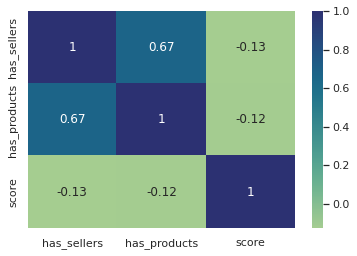

In [ ]:
df_corr = df[ ['has_sellers', 'has_products', 'score'] ].corr()

sns.heatmap(df_corr, annot=True, cmap='crest')

The Representativity is very small and totally disproportionate, so it is not a good variable for the model, the correlation shows a correlation between the two variables because tabs have similar percentages between 0 and 1 

### avg_price e avg_freight

,count,mean,std,min,25%,50%,75%,max
score,,,,,,,,
1.0,5415.0,135.134267,203.488102,3.54,44.99000,79.99,146.82,3109.99
2.0,1577.0,124.647506,177.279616,5.31,44.90000,79.90,139.90,1914.58
3.0,4219.0,114.469027,142.773717,3.06,39.99000,77.00,134.90,2090.00
4.0,10114.0,122.796838,182.041332,0.85,41.54875,79.00,139.00,4059.00
5.0,31138.0,125.003762,186.194748,0.85,41.90000,79.90,139.65,4590.00


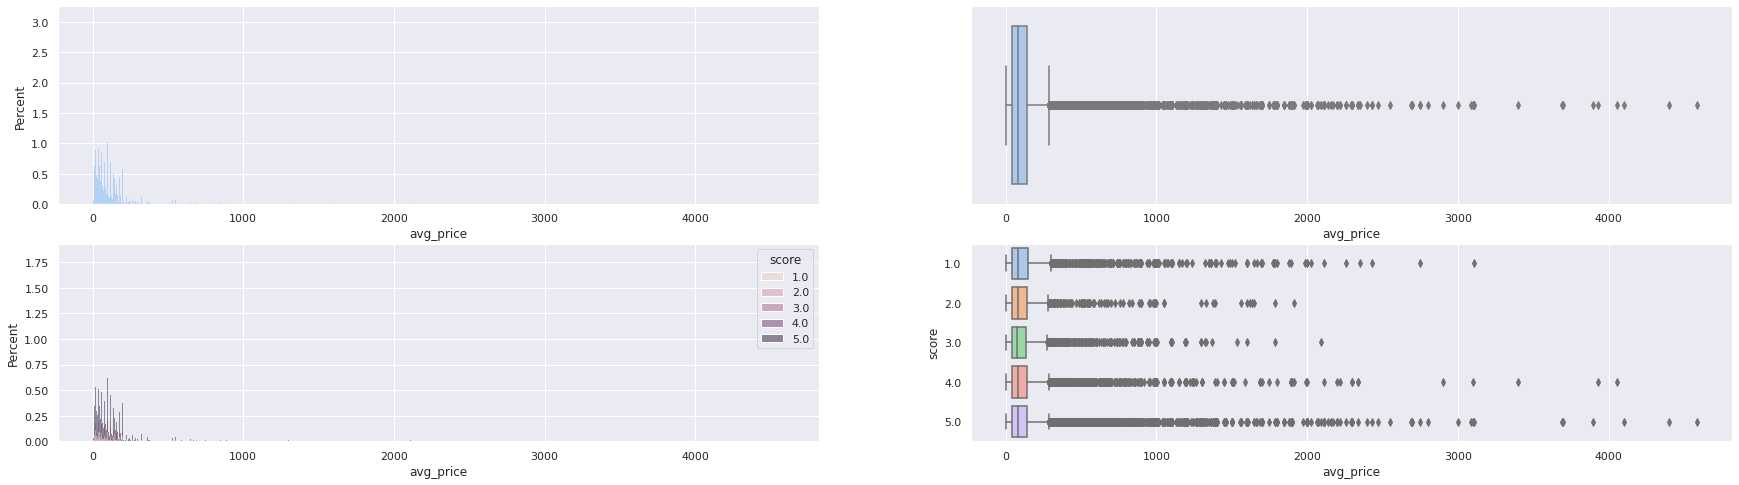

In [ ]:
 see_distribution('avg_price')

A tendency for the higher the value, the lower the score, we see in the central tendency measures and in the quartiles, the exception is the maximum values that are outliers

,count,mean,std,min,25%,50%,75%,max
score,,,,,,,,
1.0,5415.0,21.993124,18.146209,0.0,14.17,17.700,22.9000,294.76
2.0,1577.0,21.540159,18.142191,0.0,13.63,17.245,22.9300,321.88
3.0,4219.0,20.948153,15.712462,0.0,13.71,17.540,22.5050,255.92
4.0,10114.0,20.828354,16.755876,0.0,13.18,17.205,22.7575,375.28
5.0,31138.0,20.292534,16.637862,0.0,12.81,16.740,22.0000,409.68


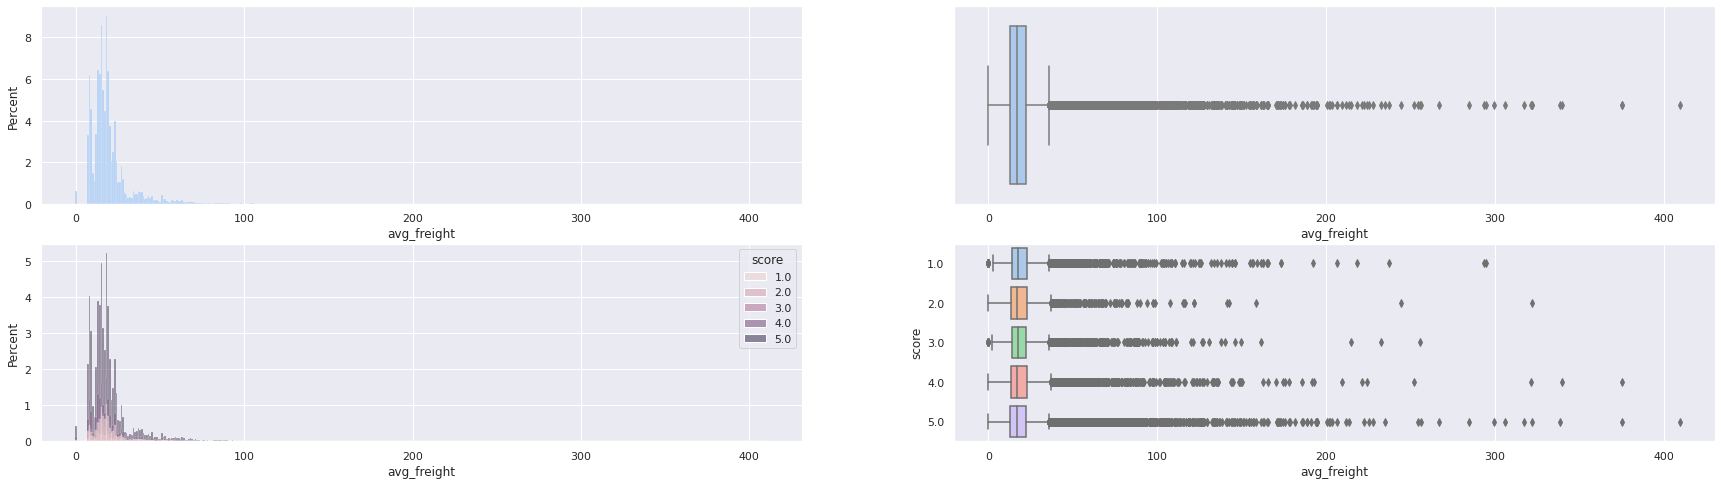

In [ ]:
see_distribution('avg_freight')

We see this same trend as with `avg_price`.

Let's look at the two variables together in relation to the score and see how the data is arranged

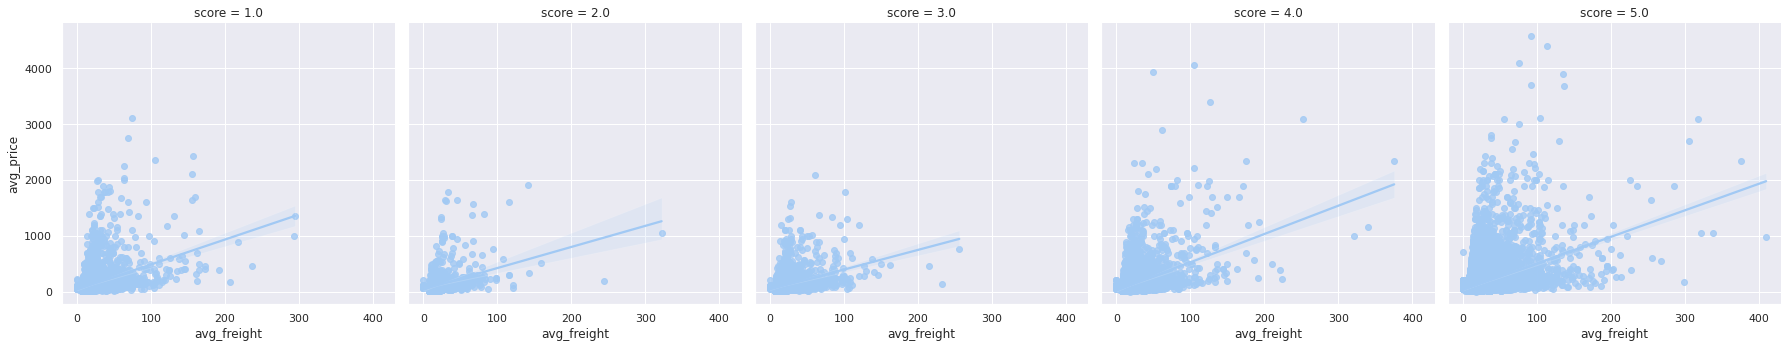

In [ ]:
sns.lmplot(data=df, x='avg_freight', y='avg_price', col='score')

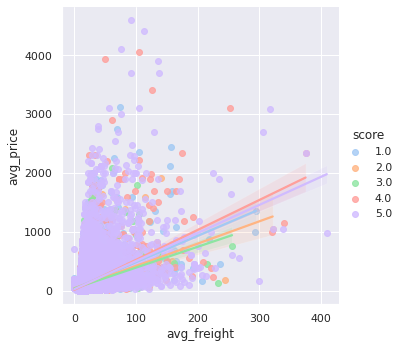

In [ ]:
sns.lmplot(data=df, x='avg_freight', y='avg_price', hue='score')

In the regression we see an easy distribution differentiating each of the scores to a straight line, not unequal between the scores, but they are slightly different from each other

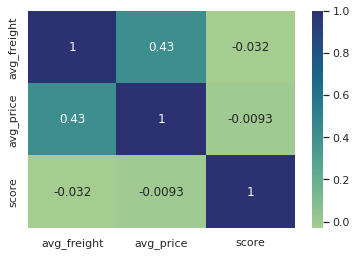

In [ ]:
df_corr = df[ ['avg_freight', 'avg_price', 'score'] ].corr()

sns.heatmap(df_corr, annot=True, cmap='crest')

Here we do not see a correction between the data the distribution between the values between all the scores is very similar, and the correlation matrix tells us that there is not a strong relationship either

We will use only these two variables in the model

In [ ]:
itens = ['avg_price', 'avg_freight']

# Product

In [ ]:
product = ['avg_name_lenght', 'avg_description_name', 'avg_photos_qty', 'avg_weight_g', 'avg_length_cm', 'avg_height_cm', 'avg_width_cm']

## Null Values

In [ ]:
df[product].isnull().sum()

avg_name_lenght         575
avg_description_name    575
avg_photos_qty          575
avg_weight_g              0
avg_length_cm             0
avg_height_cm             0
avg_width_cm              0
dtype: int64

In [ ]:
df['avg_name_lenght'].describe()

count    51888.000000
mean        49.065439
std          9.794704
min          5.000000
25%         43.000000
50%         52.000000
75%         57.000000
max         76.000000
Name: avg_name_lenght, dtype: float64

In [ ]:
mean = df['avg_name_lenght'].mean()
df['avg_name_lenght'] = df['avg_name_lenght'].fillna(mean)

In [ ]:
df['avg_description_name'].describe()

count    51888.000000
mean       816.532454
std        652.612292
min          4.000000
25%        367.000000
50%        632.000000
75%       1022.000000
max       3988.000000
Name: avg_description_name, dtype: float64

In [ ]:
mean = df['avg_description_name'].mean()
df['avg_description_name'] = df['avg_description_name'].fillna(mean)

In [ ]:
df['avg_photos_qty'].describe()

count    51888.000000
mean         2.243934
std          1.754928
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         20.000000
Name: avg_photos_qty, dtype: float64

In [ ]:
mean = df['avg_photos_qty'].mean()
df['avg_photos_qty'] = df['avg_photos_qty'].fillna(mean)

I put all of them as the mean, because it is the safest value to not disturb the distribution of values, and among all of them the mean is reliable, because the central tendency measures are close

## Distribution

In [ ]:
def see_product_distribution(column):
  fig, (ax1,ax2) = plt.subplots(2,2, figsize=(30,8))
    
  sns.histplot(data=df,x=column, stat='percent', kde=True, ax=ax1[0])
  sns.boxplot(data=df, x=column, ax=ax1[1])

  sns.histplot(data=df,x=column, hue='score', stat='percent', kde=True, ax=ax2[0])
  sns.boxplot(data=df,y='score', x=column,orient='h', ax=ax2[1])
  plt.plot()

  return df.groupby('score')[column].describe()

### `avg_name_lenght`

,count,mean,std,min,25%,50%,75%,max
score,,,,,,,,
1.0,5415.0,49.037362,9.518828,11.0,43.0,52.0,57.0,72.0
2.0,1577.0,49.110252,9.241619,17.0,44.0,51.0,57.0,64.0
3.0,4219.0,49.404327,9.552865,5.0,44.0,52.0,57.0,64.0
4.0,10114.0,49.464665,9.619704,6.0,44.0,52.0,57.0,67.0
5.0,31138.0,48.892461,9.862864,5.0,43.0,52.0,57.0,76.0


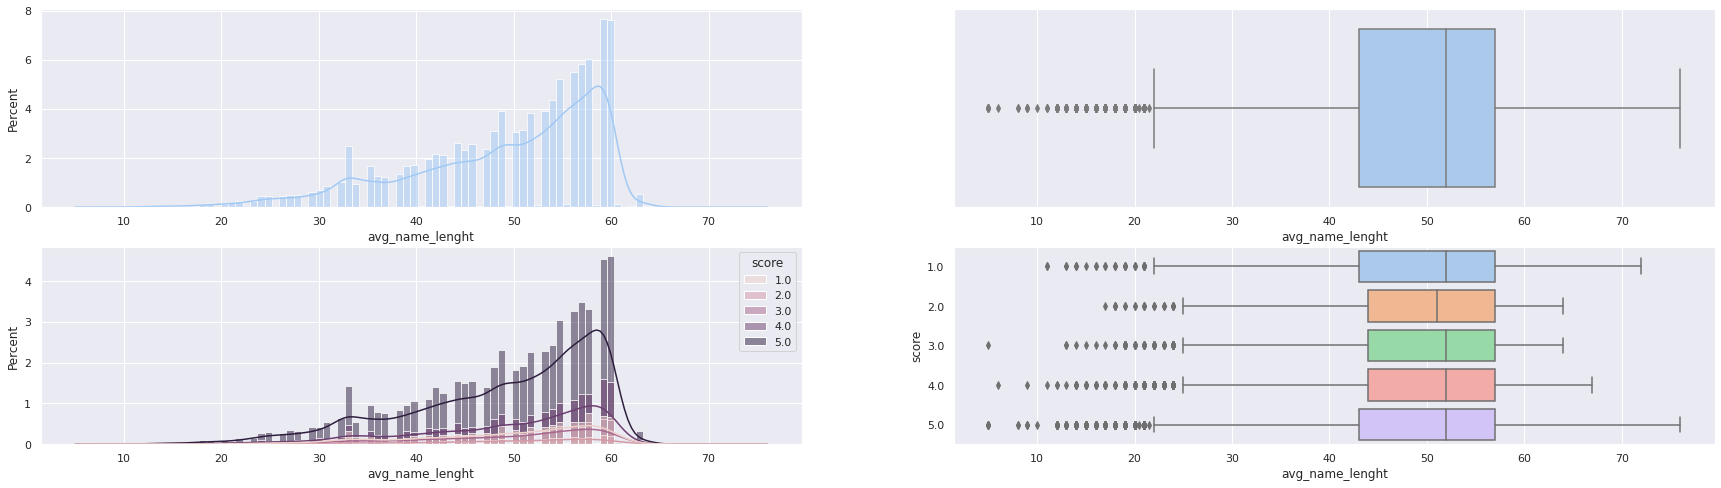

In [ ]:
see_product_distribution('avg_name_lenght')

We see a small tendency for the average to decrease while the score also decreases, but this only happens in the average

### `avg_description_name`

,count,mean,std,min,25%,50%,75%,max
score,,,,,,,,
1.0,5415.0,811.728893,652.068329,35.0,370.000,630.0,1016.0,3950.0
2.0,1577.0,773.751490,596.565926,35.0,381.000,605.0,982.0,3923.0
3.0,4219.0,801.644013,646.396767,30.0,361.000,634.0,994.5,3985.0
4.0,10114.0,827.758100,649.557475,30.0,379.625,655.0,1030.0,3985.0
5.0,31138.0,817.905536,651.134160,4.0,370.000,638.0,1010.0,3988.0


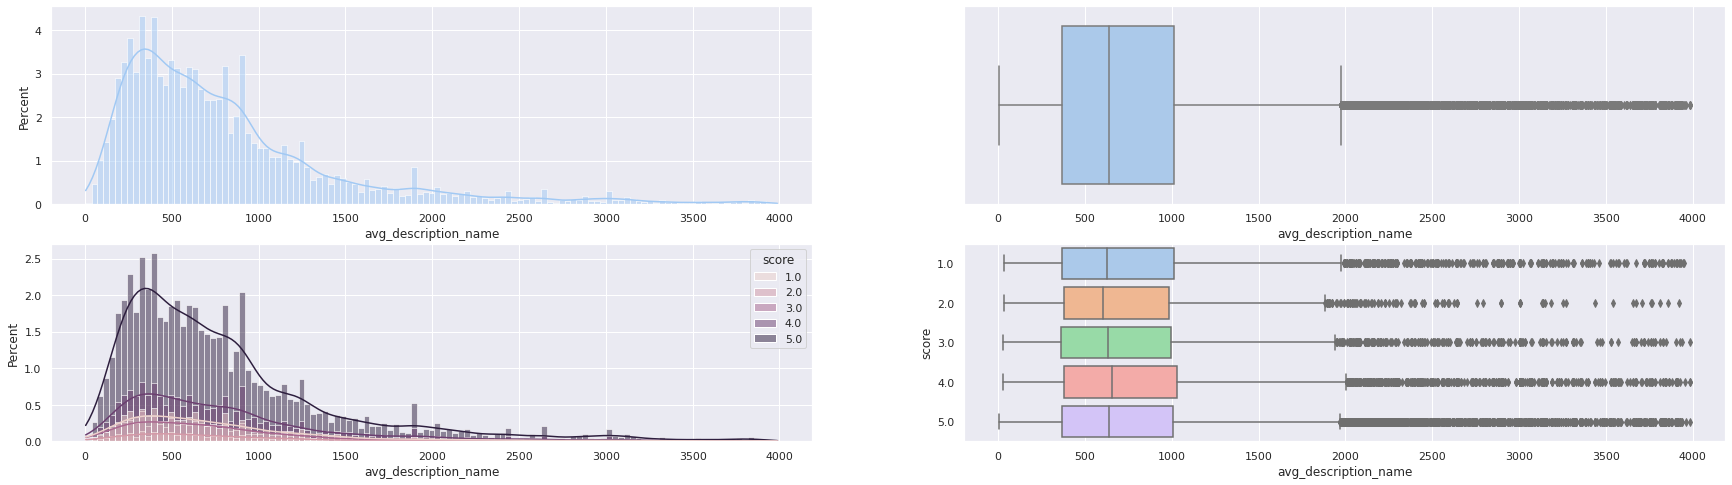

In [ ]:
see_product_distribution('avg_description_name')

We see a tendency to be lower in score = 3 being the lowest in the central tendencies

### `avg_photos_qty`

,count,mean,std,min,25%,50%,75%,max
score,,,,,,,,
1.0,5415.0,2.144713,1.694114,1.0,1.0,1.000000,3.0,19.0
2.0,1577.0,2.192932,1.739569,1.0,1.0,1.000000,3.0,17.0
3.0,4219.0,2.300743,1.788567,1.0,1.0,1.666667,3.0,11.0
4.0,10114.0,2.277549,1.756440,1.0,1.0,2.000000,3.0,17.0
5.0,31138.0,2.245156,1.744121,1.0,1.0,1.000000,3.0,20.0


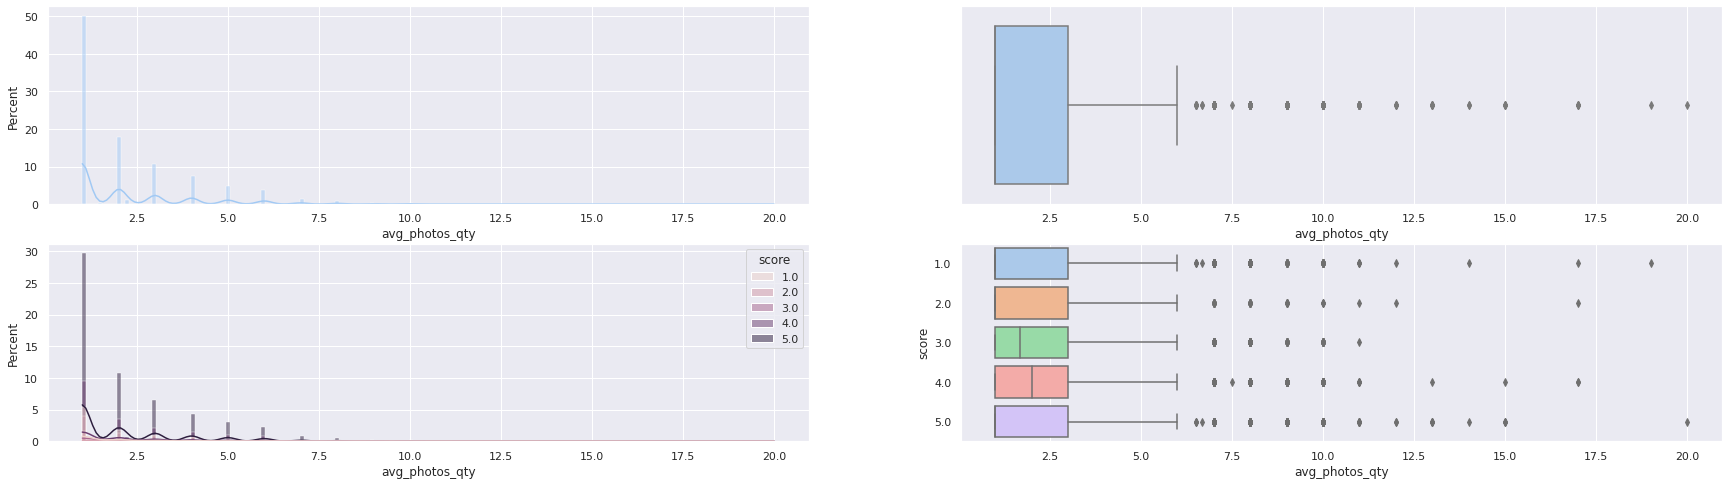

In [ ]:
see_product_distribution('avg_photos_qty')

According to the mpedia there is a tendency to decrease as the score is lower, but the median does not tell us the same thing

### `avg_weight_g`

,count,mean,std,min,25%,50%,75%,max
score,,,,,,,,
1.0,5415.0,2239.229593,4058.429961,50.0,275.0,650.0,1850.000000,30000.0
2.0,1577.0,2262.914708,4040.564016,50.0,275.0,650.0,1825.000000,30000.0
3.0,4219.0,2106.066956,3707.358186,0.0,258.0,625.0,1833.166667,30000.0
4.0,10114.0,2041.708760,3573.580772,2.0,250.0,625.0,1822.500000,30000.0
5.0,31138.0,1925.939915,3425.182627,0.0,269.0,600.0,1725.000000,40425.0


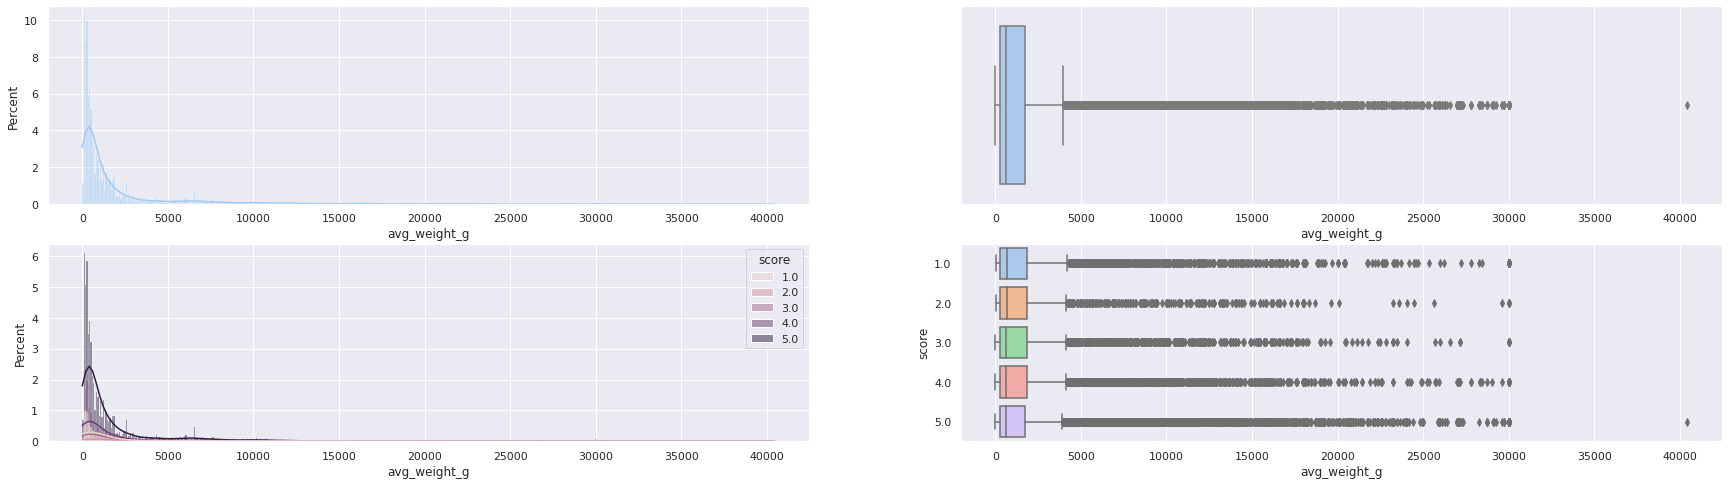

In [ ]:
see_product_distribution('avg_weight_g')

Outliers are cluttering up the value, and the central tendency measures don't tell us much, but the data are differently arranged among the statuses which represents a predictable relationship

### `avg_length_cm`

,count,mean,std,min,25%,50%,75%,max
score,,,,,,,,
1.0,5415.0,29.814224,16.462447,11.0,18.0,24.0,37.0,105.0
2.0,1577.0,30.225987,16.429334,11.0,18.0,25.0,38.0,105.0
3.0,4219.0,29.632261,15.849942,11.0,18.0,24.0,37.0,105.0
4.0,10114.0,29.560237,16.102002,9.0,18.0,23.0,37.0,105.0
5.0,31138.0,29.124936,15.646039,10.0,18.0,23.0,35.0,105.0


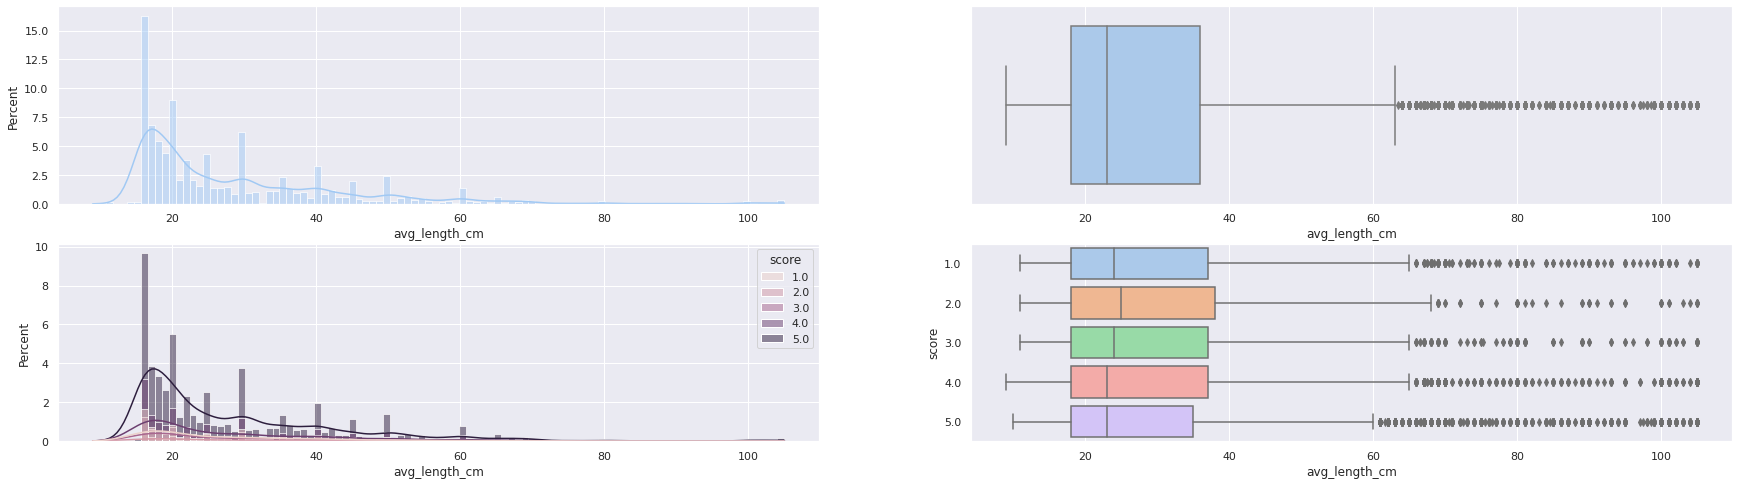

In [ ]:
see_product_distribution('avg_length_cm')

We have the same case as `avg_weight_g`.

### `avg_height_cm`

,count,mean,std,min,25%,50%,75%,max
score,,,,,,,,
1.0,5415.0,16.720903,13.821182,2.0,9.0,13.0,20.0,105.0
2.0,1577.0,16.571272,13.727284,2.0,8.0,13.0,20.0,105.0
3.0,4219.0,16.139705,13.336895,2.0,8.0,12.5,20.0,105.0
4.0,10114.0,16.162141,13.101415,2.0,8.0,13.0,20.0,105.0
5.0,31138.0,15.789772,12.382579,2.0,8.0,12.0,20.0,105.0


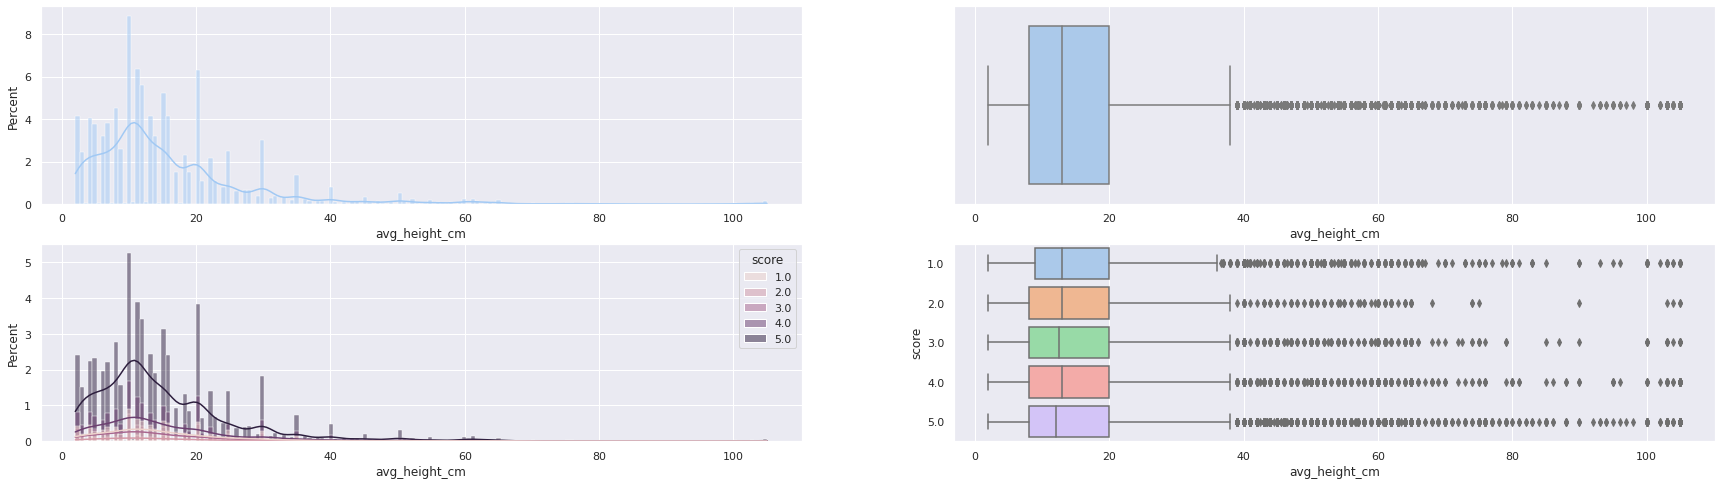

In [ ]:
see_product_distribution('avg_height_cm')

According to the quartiles we have well balanced data among the scores, we have an average that points to divergence among the scores, but it is with outliers, better to trust the quartiles

### `avg_width_cm`

,count,mean,std,min,25%,50%,75%,max
score,,,,,,,,
1.0,5415.0,22.593558,11.782524,9.0,14.0,19.0,29.0,100.0
2.0,1577.0,23.013630,11.981953,8.0,15.0,20.0,30.0,93.0
3.0,4219.0,22.719957,11.401679,7.0,15.0,20.0,30.0,100.0
4.0,10114.0,22.471831,11.337382,9.0,15.0,19.0,30.0,100.0
5.0,31138.0,22.291818,11.158373,6.0,15.0,19.0,29.0,105.0


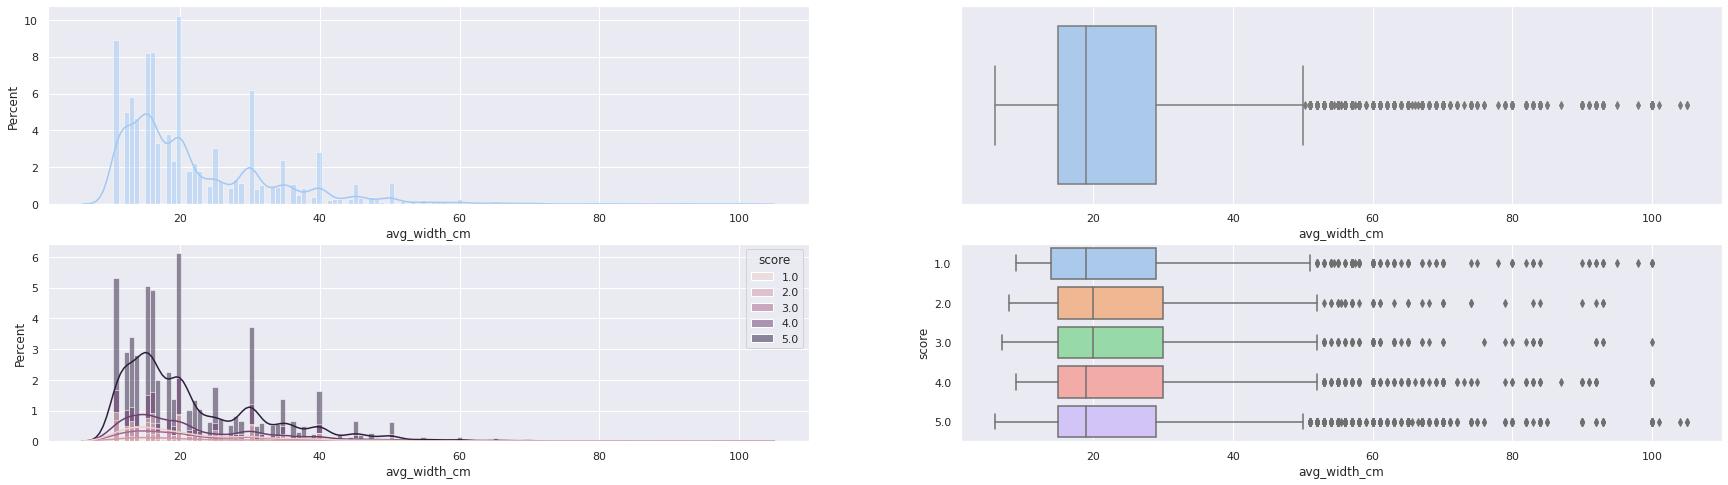

In [ ]:
see_product_distribution('avg_width_cm')

same case as `avg_height_cm`.

## Correlação

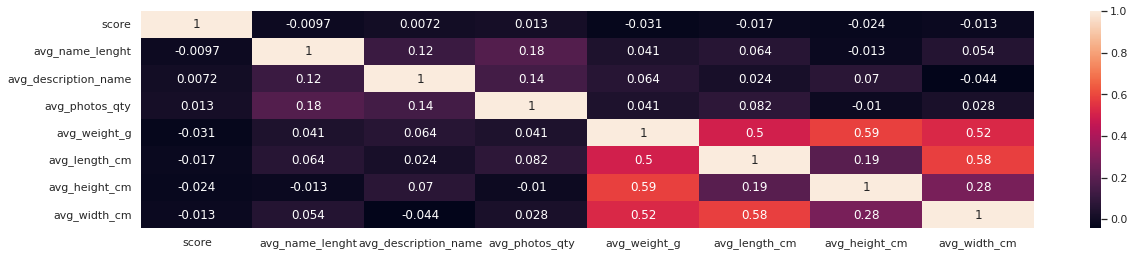

In [ ]:
df_corr = df[ ['score'] + product ].corr()

plt.figure(figsize=(20,4))
sns.heatmap(df_corr, annot=True)

They are not significantly related (with the exception of `avg_phots_qty`), but they are correlated. I want to analyze the relationship with the other variables

## Location

In [ ]:
location = ['avg_same_city', 'avg_same_state']

In [ ]:
df[location].isnull().sum()

avg_same_city     0
avg_same_state    0
dtype: int64

In [ ]:
df['avg_same_city'].value_counts(normalize=True)

0.000000    0.944342
1.000000    0.054896
0.500000    0.000591
0.333333    0.000057
0.750000    0.000019
0.833333    0.000019
0.250000    0.000019
0.600000    0.000019
0.142857    0.000019
0.666667    0.000019
Name: avg_same_city, dtype: float64

In [ ]:
df.groupby('score')['avg_same_city'].describe()

,count,mean,std,min,25%,50%,75%,max
score,,,,,,,,
1.0,5415.0,0.039318,0.193151,0.0,0.0,0.0,0.0,1.0
2.0,1577.0,0.044230,0.203440,0.0,0.0,0.0,0.0,1.0
3.0,4219.0,0.041361,0.198401,0.0,0.0,0.0,0.0,1.0
4.0,10114.0,0.053029,0.223906,0.0,0.0,0.0,0.0,1.0
5.0,31138.0,0.061219,0.239510,0.0,0.0,0.0,0.0,1.0


In [ ]:
df['avg_same_state'].value_counts(normalize=True)

0.000000    0.616434
1.000000    0.380859
0.500000    0.002020
0.333333    0.000305
0.666667    0.000210
0.750000    0.000076
0.800000    0.000038
0.833333    0.000019
0.375000    0.000019
0.250000    0.000019
Name: avg_same_state, dtype: float64

In [ ]:
df.groupby('score')['avg_same_state'].describe()

,count,mean,std,min,25%,50%,75%,max
score,,,,,,,,
1.0,5415.0,0.289812,0.451569,0.0,0.0,0.0,1.0,1.0
2.0,1577.0,0.337614,0.470135,0.0,0.0,0.0,1.0,1.0
3.0,4219.0,0.344039,0.474021,0.0,0.0,0.0,1.0,1.0
4.0,10114.0,0.375186,0.483818,0.0,0.0,0.0,1.0,1.0
5.0,31138.0,0.408017,0.491107,0.0,0.0,0.0,1.0,1.0


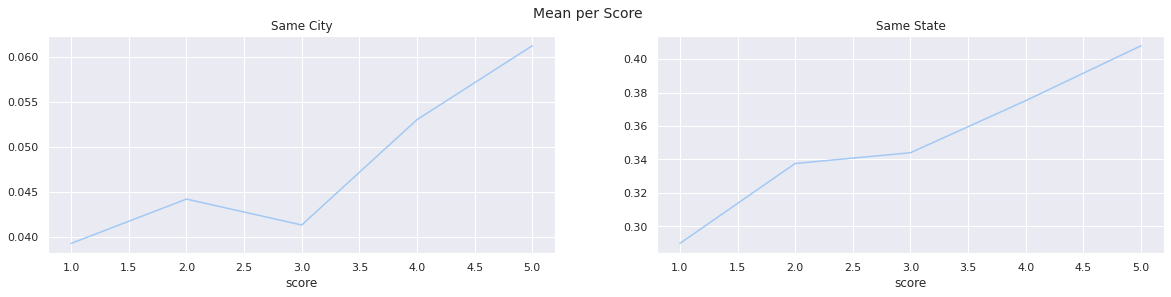

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(20,4))
df.groupby('score')['avg_same_city'].mean().plot(ax=ax[0], title='Same City')
df.groupby('score')['avg_same_state'].mean().plot(ax=ax[1], title='Same State')
fig.suptitle('Mean per Score', fontsize=14)
plt.show()

Both have a relationship that if you are from the same city or the same state there is a tendency for the score to be higher

### Matriz de contigencia

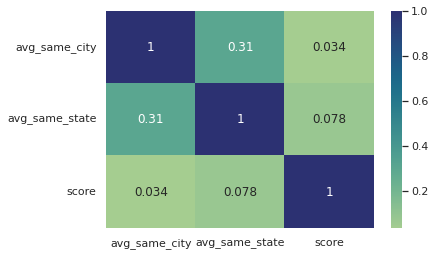

In [ ]:
df_corr = df[ location + ['score'] ].corr()

sns.heatmap(df_corr, annot=True, cmap='crest')

It is not a great correlation but it exists, so it will be used in the model

# Final Features

In [ ]:
data_features

['purchase_to_approved',
 'approved_to_carrier',
 'carrier_to_customer',
 'estimated_to_customer',
 'limit_to_carrier']

In [ ]:
payment

['has_sequential', 'has_installments', 'last_payment']

In [ ]:
itens

['avg_price', 'avg_freight']

In [ ]:
product

['avg_name_lenght',
 'avg_description_name',
 'avg_photos_qty',
 'avg_weight_g',
 'avg_length_cm',
 'avg_height_cm',
 'avg_width_cm']

In [ ]:
location

['avg_same_city', 'avg_same_state']

In [ ]:
features = ['score'] + data_features + payment + itens + product + location
df[features].head()

,score,purchase_to_approved,approved_to_carrier,carrier_to_customer,estimated_to_customer,limit_to_carrier,has_sequential,has_installments,last_payment,avg_price,avg_freight,avg_name_lenght,avg_description_name,avg_photos_qty,avg_weight_g,avg_length_cm,avg_height_cm,avg_width_cm,avg_same_city,avg_same_state
26,5.0,0,0,1,-4,-2,0,0,93.75,84.99,8.76,33.0,1127.0,2.0,450.0,16.0,4.0,20.0,0.0,1.0
27,3.0,0,0,1,-2,-2,0,0,33.23,24.90,8.33,54.0,429.0,1.0,450.0,28.0,9.0,19.0,0.0,1.0
28,5.0,0,0,1,-7,-2,0,0,61.29,45.90,15.39,26.0,394.0,1.0,1614.0,31.0,16.0,28.0,0.0,1.0
29,5.0,0,0,1,-3,-2,0,1,510.96,209.00,46.48,44.0,112.0,1.0,13550.0,48.0,49.0,49.0,1.0,1.0
30,1.0,0,0,1,-2,-2,0,1,73.10,63.90,9.20,52.0,711.0,2.0,1500.0,28.0,22.0,18.0,1.0,1.0


In [ ]:
df[features].shape

(52463, 20)

In [ ]:
df[features].isnull().sum()

score                    0
purchase_to_approved     0
approved_to_carrier      0
carrier_to_customer      0
estimated_to_customer    0
limit_to_carrier         0
has_sequential           0
has_installments         0
last_payment             0
avg_price                0
avg_freight              0
avg_name_lenght          0
avg_description_name     0
avg_photos_qty           0
avg_weight_g             0
avg_length_cm            0
avg_height_cm            0
avg_width_cm             0
avg_same_city            0
avg_same_state           0
dtype: int64

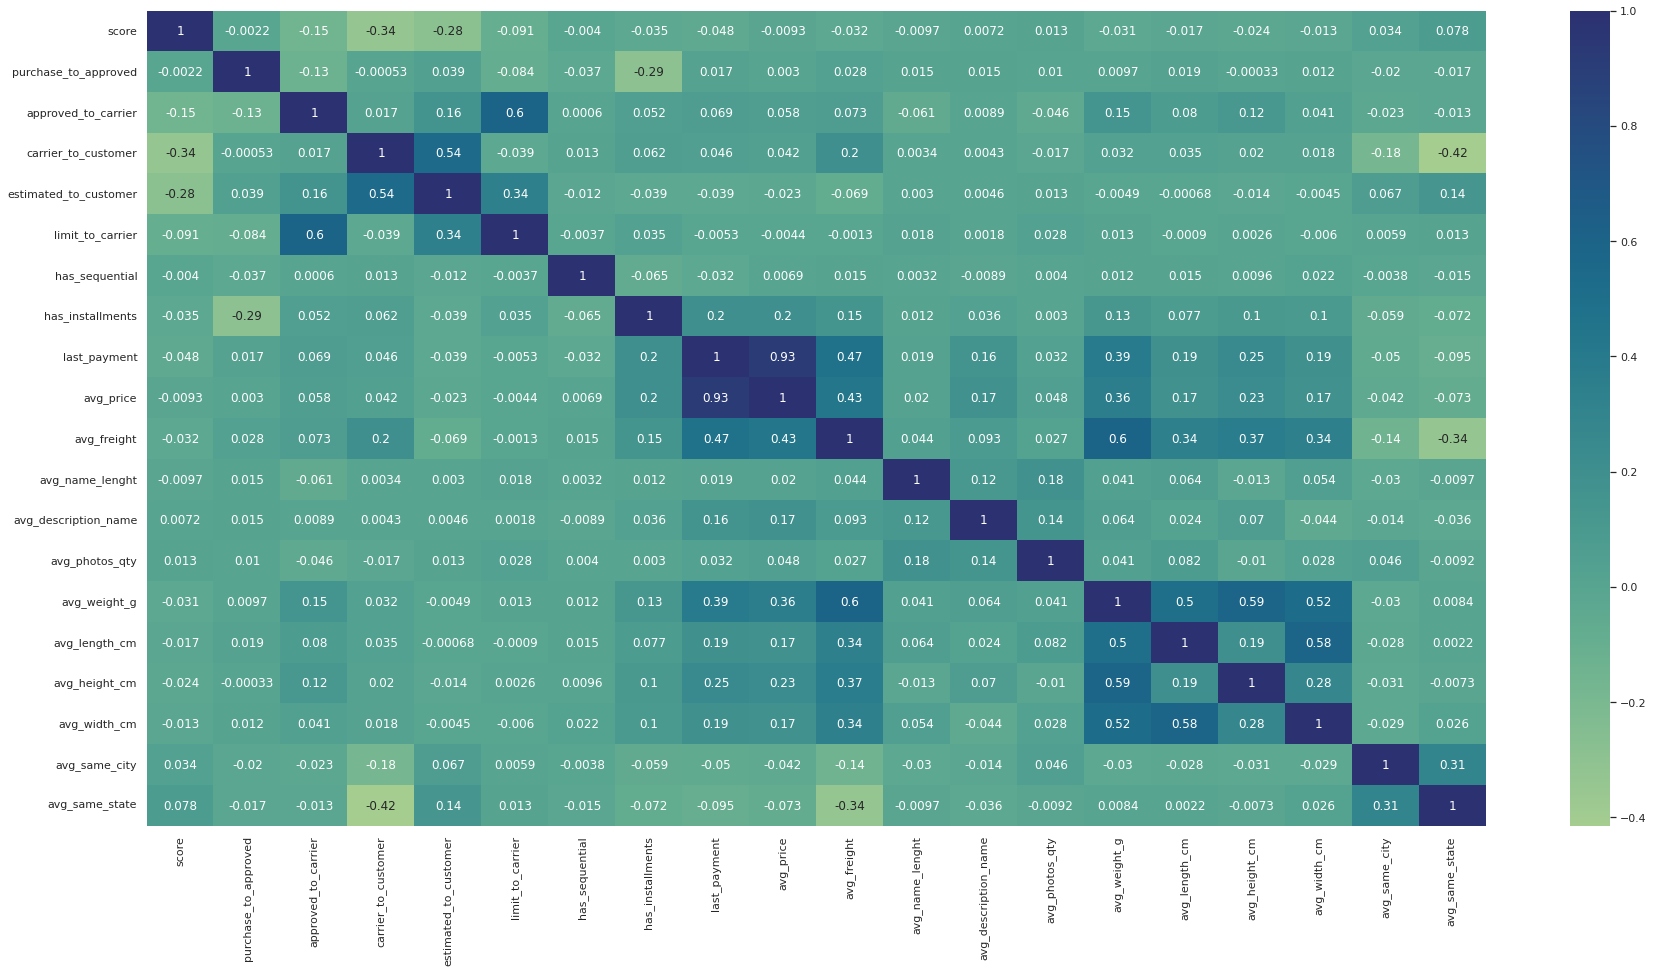

In [ ]:
df_corr = df[features].corr()

plt.figure(figsize=(30,15))
sns.heatmap(df_corr, annot=True, cmap='crest')

The model has a good correlation, the data relate well to each other

In [ ]:
from google.colab import drive

drive.mount('/content/drive',force_remount=True)
path = f'/content/drive/MyDrive/Data Science/Projects/Olist/Output/Olist_model.csv'
df[features].to_csv(path, header=True)

Mounted at /content/drive
